In [1]:
#all the necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import seaborn as sns
    

Which team has better pit Stop duration?
which team has improved their pitStop duration?

No. of pitStop and pitStop duration and its corelation to the final position


Investigate pit stop frequency, duration distributions, and correlation with final position.

Compare constructors' pit stop efficiency and its evolution over seasons.

Examine the relationship between pit stop timing, lap performance, and race outcome.

In [2]:
def function_find_encoding(filepath):
    with open(filepath, "rb") as f:
        result = chardet.detect(f.read(10000))
        encoding = result['encoding']
    return encoding
constructors = pd.read_csv("f1/constructors.csv", encoding = function_find_encoding("f1/constructors.csv"))
drivers = pd.read_csv("f1/drivers.csv", encoding = function_find_encoding("f1/drivers.csv"))
races = pd.read_csv("f1/races.csv", encoding = function_find_encoding("f1/races.csv"))
results = pd.read_csv("f1/results.csv", encoding = function_find_encoding("f1/results.csv"))
pitStops = pd.read_csv("f1/pitStops.csv", encoding = function_find_encoding("f1/pitStops.csv"))

    

In [3]:
status = pd.read_csv("f1/status.csv", encoding = function_find_encoding("f1/status.csv"))

In [4]:
def find_shape(df, df_name):
    print(f"{df_name} shape: {df.shape}")
find_shape(constructors, "constructors")
find_shape(drivers,"drivers")
find_shape(races, "races")
find_shape(results, "results")
find_shape(pitStops, "pitStops")
find_shape(status, "status")


constructors shape: (208, 6)
drivers shape: (842, 9)
races shape: (997, 8)
results shape: (23777, 18)
pitStops shape: (6251, 7)
status shape: (134, 2)


In [5]:
constructors.columns


Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url',
       'Unnamed: 5'],
      dtype='object')

In [6]:
drivers.columns


Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [7]:
races.columns


Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url'], dtype='object')

In [8]:
results.columns


Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [9]:
pitStops.columns


Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration',
       'milliseconds'],
      dtype='object')

In [10]:
status.columns

Index(['statusId', 'status'], dtype='object')

In [11]:
races.sample(10)

,raceId,year,round,circuitId,name,date,time,url
789,790,1956,7,20,German Grand Prix,1956-08-05,NaN,http://en.wikipedia.org/wiki/1956_German_Grand...
915,918,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,13:00:00,http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...
106,107,2004,18,18,Brazilian Grand Prix,2004-10-24,NaN,http://en.wikipedia.org/wiki/2004_Brazilian_Gr...
199,200,1998,10,23,Austrian Grand Prix,1998-07-26,NaN,http://en.wikipedia.org/wiki/1998_Austrian_Gra...
639,640,1971,9,14,Italian Grand Prix,1971-09-05,NaN,http://en.wikipedia.org/wiki/1971_Italian_Gran...
39,40,2007,5,6,Monaco Grand Prix,2007-05-27,12:00:00,http://en.wikipedia.org/wiki/2007_Monaco_Grand...
970,983,2017,15,2,Malaysian Grand Prix,2017-10-01,07:00:00,https://en.wikipedia.org/wiki/2017_Malaysian_G...
498,499,1980,2,18,Brazilian Grand Prix,1980-01-27,NaN,http://en.wikipedia.org/wiki/1980_Brazilian_Gr...
965,978,2017,10,9,British Grand Prix,2017-07-16,12:00:00,https://en.wikipedia.org/wiki/2017_British_Gra...
733,734,1962,6,20,German Grand Prix,1962-08-05,NaN,http://en.wikipedia.org/wiki/1962_German_Grand...


In [12]:
races.year.min()

np.int64(1950)

In [13]:
races.year.max()

np.int64(2018)

In [14]:
races_to_be_evaluated = races[races.year >= 2000]

In [15]:
races_to_be_evaluated.shape

(351, 8)

In [16]:
race_Id_all = races.raceId.unique()

In [17]:
races_to_be_evaluated.year.unique()

array([2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [18]:
#variable to keep the array of all the raceIds from year 2000 to 2018
race_0_18_id = races_to_be_evaluated.raceId.unique()

In [19]:
common = list(np.intersect1d(race_Id_all, race_0_18_id))


In [20]:
#look for all the ids that are not common, i.e find raceId which are beyond our timeline
race_Id_out =[]

for i in range(0, len(race_Id_all)):
    if race_Id_all[i] not in common:
        race_Id_out.append(race_Id_all[i]) #store it in the variable 


In [21]:
pitStops.sample(5)

,raceId,driverId,stop,lap,time,duration,milliseconds
4644,949,828,2,29,18:52:47,25.363,25363
1418,864,808,3,44,15:11:45,21.817,21817
296,845,2,2,36,14:59:22,21.953,21953
1328,863,20,2,25,15:45:43,22.717,22717
3586,913,821,1,15,20:33:38,33.679,33679


In [22]:
#analysing pitStop with race results
pitStops_copy = pitStops.copy()



In [23]:
results_copy = results.copy()

In [24]:
pitStops_copy = pitStops_copy[(pitStops_copy.raceId < race_Id_out[0]) | (pitStops_copy.raceId > race_Id_out[-1]) ]

In [25]:
pitStops_copy.sample(10)

,raceId,driverId,stop,lap,time,duration,milliseconds
4315,939,830,2,36,21:16:29,30.844,30844
3969,929,815,2,37,19:06:50,25.288,25288
6217,987,840,4,28,14:42:27,22.486,22486
852,855,1,1,8,15:17:14,21.091,21091
829,854,20,2,30,21:01:48,30.809,30809
493,848,10,2,42,15:20:26,22.030,22030
4941,956,815,2,26,14:35:10,21.412,21412
1656,870,39,1,18,14:34:22,21.259,21259
5475,967,807,1,20,14:47:44,33:28.504,2008504
2974,899,4,1,21,14:31:09,22.755,22755


In [26]:
pitStops_copy.count()

raceId          6251
driverId        6251
stop            6251
lap             6251
time            6251
duration        6251
milliseconds    6251
dtype: int64

In [27]:
pitStops_copy.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object

In [28]:
 pitStops_copy.milliseconds.min(), pitStops_copy.milliseconds.max()

(np.int64(12897), np.int64(2011266))

In [29]:
median = pitStops_copy.milliseconds.median()
q1 = pitStops_copy.milliseconds.quantile(0.25)
q3 = pitStops_copy.milliseconds.quantile(0.75)
iqr = q3 - q1
threshold = q3 + 1.5 * iqr
pitStops_copy["milliseconds"] = np.where(pitStops_copy.milliseconds > threshold,
                                          median, 
                                          pitStops_copy.milliseconds)

In [30]:
 pitStops_copy.milliseconds.min(), pitStops_copy.milliseconds.max()

(np.float64(12897.0), np.float64(31207.0))

In [31]:
status.shape

(134, 2)

In [32]:
#to find out the instances of the status column 
status.status.unique()


array(['Finished', 'Disqualified', 'Accident', 'Collision', 'Engine',
       'Gearbox', 'Transmission', 'Clutch', 'Hydraulics', 'Electrical',
       '+1 Lap', '+2 Laps', '+3 Laps', '+4 Laps', '+5 Laps', '+6 Laps',
       '+7 Laps', '+8 Laps', '+9 Laps', 'Spun off', 'Radiator',
       'Suspension', 'Brakes', 'Differential', 'Overheating',
       'Mechanical', 'Tyre', 'Driver Seat', 'Puncture', 'Driveshaft',
       'Retired', 'Fuel pressure', 'Front wing', 'Water pressure',
       'Refuelling', 'Wheel', 'Throttle', 'Steering', 'Technical',
       'Electronics', 'Broken wing', 'Heat shield fire', 'Exhaust',
       'Oil leak', '+11 Laps', 'Wheel rim', 'Water leak', 'Fuel pump',
       'Track rod', '+17 Laps', 'Oil pressure', '+42 Laps', '+13 Laps',
       'Withdrew', '+12 Laps', 'Engine fire', 'Engine misfire',
       '+26 Laps', 'Tyre puncture', 'Out of fuel', 'Wheel nut',
       'Not classified', 'Pneumatics', 'Handling', 'Rear wing', 'Fire',
       'Wheel bearing', 'Physical', 'Fuel sys

In [33]:
status.statusId[status.status == "Finished"]

0    1
Name: statusId, dtype: int64

In [34]:
#constraint the data of results of which status is finished( which have statusId of 1)
results_copy["statusId"] = np.where( results_copy.statusId > 1, np.nan, 1)

In [35]:
results_filtered = results_copy.dropna(subset = ["statusId"])

In [36]:
results_filtered = results_filtered.drop(["number", "points", "laps", "time", "milliseconds", "fastestLap", "statusId"], axis = 1)

In [37]:
results_filtered.shape

(6009, 11)

In [38]:
results_filtered.count()

resultId           6009
raceId             6009
driverId           6009
constructorId      6009
grid               6009
position           6009
positionText       6009
positionOrder      6009
rank               2626
fastestLapTime     2611
fastestLapSpeed    2611
dtype: int64

In [39]:
results_filtered = results_filtered.dropna(subset = ["rank", "fastestLapTime", "fastestLapSpeed"])

In [40]:
print(results_filtered.shape)
print(results_filtered.count())


(2611, 11)
resultId           2611
raceId             2611
driverId           2611
constructorId      2611
grid               2611
position           2611
positionText       2611
positionOrder      2611
rank               2611
fastestLapTime     2611
fastestLapSpeed    2611
dtype: int64


In [41]:
pitStop_result = pd.merge(results_filtered, pitStops_copy, on = ["raceId", "driverId"], how = "inner")

In [42]:
pitStop_result.shape
pitStop_result.count()

resultId           3183
raceId             3183
driverId           3183
constructorId      3183
grid               3183
position           3183
positionText       3183
positionOrder      3183
rank               3183
fastestLapTime     3183
fastestLapSpeed    3183
stop               3183
lap                3183
time               3183
duration           3183
milliseconds       3183
dtype: int64

In [43]:
min_max_pitStop  = (pitStop_result.stop.min(), pitStop_result.stop.max())

In [44]:
#creating new dataframes for the minimum and maximum no of pitStops
min_pitStops = pitStop_result[pitStop_result.stop == min_max_pitStop[0]]
max_pitStops = pitStop_result[pitStop_result.stop == min_max_pitStop[1]]

In [45]:
print(min_pitStops.shape)
print(max_pitStops.shape)

(1413, 16)
(6, 16)


In [46]:
max_pitStops

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,rank,fastestLapTime,fastestLapSpeed,stop,lap,time,duration,milliseconds
127,20920,847,18,1,7,1.0,1,1,1.0,01:17.0,204.007,6,51,16:36:41,23.741,23741.0
247,21019,851,1,1,2,4.0,4,4,2.0,01:23.7,188.517,6,56,15:30:48,13.173,13173.0
2152,22721,936,1,131,1,6.0,6,6,3.0,01:25.7,183.974,6,54,15:31:15,16.579,16579.0
2192,22729,936,813,208,14,14.0,14,14,9.0,01:27.1,181.012,6,58,15:37:12,16.446,16446.0
3101,23651,982,839,10,14,10.0,10,10,12.0,01:47.7,169.339,6,38,21:29:07,29.134,29134.0
3107,23652,982,13,3,17,11.0,11,11,8.0,01:47.1,170.323,6,37,21:27:05,29.671,29671.0


In [47]:
#average position
max_pitStops.position.min(), max_pitStops.position.max()

(np.float64(1.0), np.float64(14.0))

In [48]:
cor = pitStop_result.stop.corr(pitStop_result.position)

In [49]:
cor

np.float64(0.04694522535703901)

In [50]:
max_pitStops_mean_position = max_pitStops.position.mean()
min_pitStops_mean_position = min_pitStops.position.mean()
std_max_pitStops = max_pitStops.position.std()
std_min_pitStops = min_pitStops.position.std()
print(f"mean_position for minimum pitStop: {min_pitStops_mean_position:.2f}")
print(f"mean_position for maximum pitStop: {max_pitStops_mean_position:.2f}")
print(f"Standard deviation for minimum pitStop : {std_max_pitStops:.2f}")
print(f"Standard deviation for maximum pitStop : {std_min_pitStops:.2f}")


mean_position for minimum pitStop: 6.34
mean_position for maximum pitStop: 7.67
Standard deviation for minimum pitStop : 4.84
Standard deviation for maximum pitStop : 3.91


In [51]:
#pitStop_durations
pitStop_result.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
grid                 int64
position           float64
positionText        object
positionOrder        int64
rank               float64
fastestLapTime      object
fastestLapSpeed     object
stop                 int64
lap                  int64
time                object
duration            object
milliseconds       float64
dtype: object

In [52]:
correlation_duration_position = pitStop_result.milliseconds.corr(pitStop_result.position)

In [53]:
correlation_duration_position

np.float64(0.09334511240399038)

Conclusion: There is almost no corelation between no.of pitStop and the position. Also there is no corelation between pitStop duration and the position. 


In [54]:
#Analysing the evolution of pitStop duration within the timeline


In [55]:
df_for_timeline = pd.merge( races_to_be_evaluated, pitStops_copy, on = ["raceId"], how = "inner")

In [56]:
df_for_timeline.dtypes

raceId            int64
year              int64
round             int64
circuitId         int64
name             object
date             object
time_x           object
url              object
driverId          int64
stop              int64
lap               int64
time_y           object
duration         object
milliseconds    float64
dtype: object

In [57]:
df_for_timeline.shape

(6251, 14)

In [58]:
df_for_timeline.count()

raceId          6251
year            6251
round           6251
circuitId       6251
name            6251
date            6251
time_x          6251
url             6251
driverId        6251
stop            6251
lap             6251
time_y          6251
duration        6251
milliseconds    6251
dtype: int64

In [59]:
df_for_timeline["seconds"] = df_for_timeline["milliseconds"]*0.001

In [60]:
data_for_mean = df_for_timeline.groupby("year").seconds.mean()

In [61]:
print(data_for_mean)

year
2011    22.897417
2012    22.683408
2013    23.073402
2014    24.411382
2015    24.230911
2016    23.903843
2017    23.348291
Name: seconds, dtype: float64


<Axes: title={'center': 'Average of PitStop duration from 2011 to 2017'}, xlabel='year'>

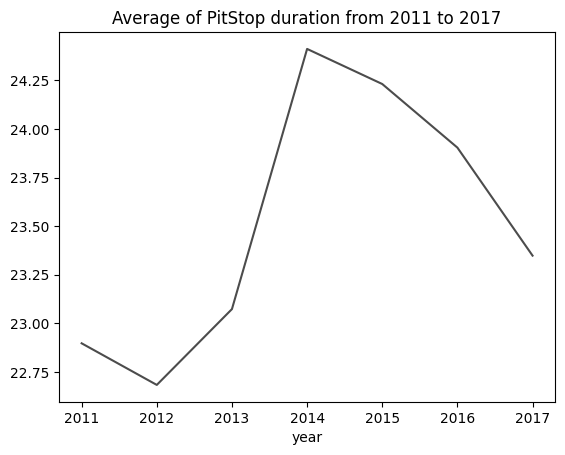

In [62]:
fig2, axes = plt.subplots(1,1)
data = data_for_mean
data.plot(kind = "line" , color = "k", alpha = 0.7,
         title = "Average of PitStop duration from 2011 to 2017")


In [63]:
min_duration_sec = pitStop_result.milliseconds.min()*0.001
min_duration_sec

np.float64(13.173)

In [64]:
max_duration_sec = pitStop_result.milliseconds.max()*0.001
max_duration_sec

np.float64(31.207)

In [65]:
pitStop_result[["constructorId", "raceId", "driverId", "position", "grid"]][pitStop_result.milliseconds == pitStop_result.milliseconds.min()]

,constructorId,raceId,driverId,position,grid
247,1,851,1,4.0,2


In [66]:
constructor = constructors[constructors.constructorId == 1].name
race = races[races.raceId == 851][["year","name"]]
driver = drivers[drivers.driverId == 1][["forename","surname"]]
print(constructor)
print()
print(driver)
print()
print(race)

0    McLaren
Name: name, dtype: object

  forename   surname
0    Lewis  Hamilton

     year                  name
849  2011  Hungarian Grand Prix


In [67]:
pitStop_result[["constructorId", "raceId", "driverId", "position", "grid"]][pitStop_result.milliseconds == pitStop_result.milliseconds.max()]

,constructorId,raceId,driverId,position,grid
2234,5,939,830,8.0,8


In [68]:
constructor = constructors[constructors.constructorId == 5].name
race = races[races.raceId == 939][["year","name"]]
driver = drivers[drivers.driverId == 830][["forename","surname"]]
print(constructor)
print()
print(driver)
print()
print(race)

4    Toro Rosso
Name: name, dtype: object

    forename     surname
829      Max  Verstappen

     year                  name
928  2015  Singapore Grand Prix


Conclusion: From 2011 to 2017, Toro Rosso had the most pitStop duration which was 31.207 seconds in 2015 in Singapore Grand Prix.  He started at 8 and  finished 8. McLaren had the minimum pitStop duration which was 13.173 with Lewis Hamilton in 2011 ( Hungarian Grand Prix). He started at 2 but suprisingly finished 4. 

**Each Consctructo PitStop duration along the years**

In [69]:
constructors.sample(5)

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
102,104,behra-porsche,Behra-Porsche,Italian,http://en.wikipedia.org/wiki/Behra-Porsche,NaN
37,38,moda,Andrea Moda,Italian,http://en.wikipedia.org/wiki/Andrea_Moda_Formula,NaN
86,88,eagle,Eagle,American,http://en.wikipedia.org/wiki/Anglo_American_Ra...,NaN
46,48,rial,Rial,German,http://en.wikipedia.org/wiki/Rial_%28racing_te...,NaN
186,189,eagle-climax,Eagle-Climax,American,http://en.wikipedia.org/wiki/Anglo_American_Ra...,NaN


In [70]:
constructors.shape

(208, 6)

In [71]:
constructors.count()

constructorId     208
constructorRef    208
name              208
nationality       208
url               208
Unnamed: 5          0
dtype: int64

In [72]:
names = list(constructors.name.unique())

In [114]:
pitStop_result[pitStop_result.constructorId == 1].milliseconds.mean()

np.float64(22792.555873925503)

In [73]:
names.sort(reverse = True)
names

['Zakspeed',
 'Wolf',
 'Williams',
 'Wetteroth',
 'Watson',
 'Virgin',
 'Veritas',
 'Vanwall',
 'Tyrrell',
 'Turner',
 'Trojan',
 'Trevis',
 'Toyota',
 'Toro Rosso',
 'Toleman',
 'Token',
 'Theodore',
 'Tecno',
 'Tec-Mec',
 'Team Lotus',
 'Talbot-Lago',
 'Sutton',
 'Surtees',
 'Super Aguri',
 'Stewart',
 'Stevens',
 'Stebro',
 'Spyker MF1',
 'Spyker',
 'Spirit',
 'Snowberger',
 'Simtek',
 'Simca',
 'Sherman',
 'Shannon',
 'Shadow-Matra',
 'Shadow-Ford',
 'Shadow',
 'Scirocco',
 'Schroeder',
 'Scarab',
 'Sauber',
 'Rial',
 'Renault',
 'Red Bull',
 'Rebaque',
 'Rae',
 'RE',
 'RAM',
 'Protos',
 'Prost',
 'Porsche',
 'Politoys',
 'Phillips',
 'Penske',
 'Pawl',
 'Parnelli',
 'Pankratz',
 'Pacific',
 'Osella',
 'Onyx',
 'Olson',
 'OSCA',
 'Nichels',
 'Moore',
 'Minardi',
 'Milano',
 'Meskowski',
 'Merzario',
 'Mercedes',
 'McLaren-Serenissima',
 'McLaren-Ford',
 'McLaren-BRM',
 'McLaren-Alfa Romeo',
 'McLaren',
 'McGuire',
 'Matra-Ford',
 'Matra',
 'Maserati',
 'Marussia',
 'Martini',
 'Mar

In [74]:
#Ferrrari, Mclaren, Mercedes, Red Bull 
def find_id(name):
    return constructors[constructors.name == name].constructorId.values[0]
ferr_id, mclaren_id, mercedes_id, redbull_id = find_id("Ferrari"), find_id("McLaren"), find_id("Mercedes"),find_id("Red Bull")
teams_ids = [ferr_id, mclaren_id, mercedes_id, redbull_id]

In [75]:
df_for_anlys = pitStop_result[["milliseconds","constructorId","raceId"]]

In [122]:
gr_best_mean = pitStop_result.groupby(["constructorId"], as_index = False)

In [123]:
gr_best_mean.milliseconds.mean().max()

constructorId      210.000000
milliseconds     25934.541667
dtype: float64

In [126]:
Temp = gr_best_mean.milliseconds.mean()

In [127]:
Temp.shape

(16, 2)

In [130]:
Temp[Temp.milliseconds == Temp.milliseconds.max()]

,constructorId,milliseconds
11,206,25934.541667


In [131]:
Temp[Temp.milliseconds == Temp.milliseconds.min()]

,constructorId,milliseconds
10,205,21914.666667


In [124]:
gr_best_mean.milliseconds.mean().min()

constructorId        1.000000
milliseconds     21914.666667
dtype: float64

In [132]:
constructors[constructors.constructorId == 205]

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
202,205,lotus_racing,Lotus,Malaysian,http://en.wikipedia.org/wiki/Lotus_Racing,NaN


In [133]:
constructors[constructors.constructorId == 206]

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
203,206,marussia,Marussia,Russian,http://en.wikipedia.org/wiki/Marussia_F1,NaN


**RESULT** : Throughout the year of 2011 and 2017, Marussia has had the highest overall pitStop duration in F1 with the mean of 25934.542 milliseconds. While Lotus Racing holds the minimum overall pitStop duration in F1 with the mean of 21914.67 milliseconds

In [76]:

df_for_anlys = df_for_anlys[df_for_anlys.constructorId.isin(teams_ids)]
df_for_anlys = pd.merge(df_for_anlys, constructors, on = ["constructorId"], how = "inner")


In [77]:
df_for_anlys.shape

(1843, 8)

In [78]:
df_for_anlys.columns

Index(['milliseconds', 'constructorId', 'raceId', 'constructorRef', 'name',
       'nationality', 'url', 'Unnamed: 5'],
      dtype='object')

In [79]:
df_for_anlys = df_for_anlys.drop(["nationality", "constructorRef", "url","Unnamed: 5"], axis = 1)

In [80]:
group_constructor = df_for_anlys.groupby(["name"])

In [81]:
group_constructor.milliseconds.mean()

name
Ferrari     23084.539526
McLaren     22792.555874
Mercedes    23082.461698
Red Bull    22774.871287
Name: milliseconds, dtype: float64

In [82]:
df_for_anlys.count()

milliseconds     1843
constructorId    1843
raceId           1843
name             1843
dtype: int64

In [83]:
df_for_anlys.sample(5)

,milliseconds,constructorId,raceId,name
425,19888.0,1,864,McLaren
207,26046.0,1,852,McLaren
1160,22295.0,131,926,Mercedes
1083,30194.0,6,913,Ferrari
1506,23340.0,131,960,Mercedes


In [84]:
df_for_anlys["seconds"] = df_for_anlys.milliseconds*0.001

In [85]:
df_for_anlys =  pd.merge(df_for_anlys, races, on = ["raceId"], how = "inner")

In [87]:
df_for_anlys.columns

Index(['milliseconds', 'constructorId', 'raceId', 'name_x', 'seconds', 'year',
       'round', 'circuitId', 'name_y', 'date', 'time', 'url'],
      dtype='object')

In [88]:
df_for_anlys = df_for_anlys.rename(columns = {"name_x" : "name"})

In [89]:
def df_maker_team( name):
    df_return  = df_for_anlys.copy()
    df_return["name"] = np.where(df_for_anlys.name == name, df_for_anlys.name, np.nan)
    df_return = df_return.dropna()
    df_return = df_return.drop(["constructorId"], axis = 1)
    return df_return
df_for_mclaren = df_maker_team("McLaren")
df_for_mercedes = df_maker_team("Mercedes")
df_for_redbull = df_maker_team("Red Bull")
df_for_ferrari = df_maker_team("Ferrari")


In [90]:
df_for_ferrari.columns

Index(['milliseconds', 'raceId', 'name', 'seconds', 'year', 'round',
       'circuitId', 'name_y', 'date', 'time', 'url'],
      dtype='object')

In [91]:
df_for_ferrari.sample(5)

,milliseconds,raceId,name,seconds,year,round,circuitId,name_y,date,time,url
1679,25856.0,971,Ferrari,25.856,2017,3,3,Bahrain Grand Prix,2017-04-16,15:00:00,https://en.wikipedia.org/wiki/2017_Bahrain_Gra...
566,19368.0,877,Ferrari,19.368,2012,18,24,Abu Dhabi Grand Prix,2012-11-04,13:00:00,http://en.wikipedia.org/wiki/2012_Abu_Dhabi_Gr...
1797,23575.0,985,Ferrari,23.575,2017,17,69,United States Grand Prix,2017-10-22,19:00:00,https://en.wikipedia.org/wiki/2017_United_Stat...
1693,24306.0,974,Ferrari,24.306,2017,6,6,Monaco Grand Prix,2017-05-28,12:00:00,https://en.wikipedia.org/wiki/2017_Monaco_Gran...
113,24886.0,847,Ferrari,24.886,2011,7,7,Canadian Grand Prix,2011-06-12,17:00:00,http://en.wikipedia.org/wiki/2011_Canadian_Gra...


In [134]:
group_year = df_for_ferrari.groupby("year")
group_year.milliseconds.mean()

year
2011    22621.639535
2012    22147.142857
2013    22451.284091
2014    23931.196721
2015    24258.241379
2016    23759.839506
2017    22870.564516
Name: milliseconds, dtype: float64

In [ ]:
s

In [93]:
df_for_ferrari[df_for_ferrari.year == 2016]

,milliseconds,raceId,name,seconds,year,round,circuitId,name_y,date,time,url
1352,21339.0,948,Ferrari,21.339,2016,1,1,Australian Grand Prix,2016-03-20,05:00:00,https://en.wikipedia.org/wiki/2016_Australian_...
1353,23340.0,948,Ferrari,23.340,2016,1,1,Australian Grand Prix,2016-03-20,05:00:00,https://en.wikipedia.org/wiki/2016_Australian_...
1354,24548.0,948,Ferrari,24.548,2016,1,1,Australian Grand Prix,2016-03-20,05:00:00,https://en.wikipedia.org/wiki/2016_Australian_...
1361,24720.0,949,Ferrari,24.720,2016,2,3,Bahrain Grand Prix,2016-04-03,15:00:00,https://en.wikipedia.org/wiki/2016_Bahrain_Gra...
1362,25222.0,949,Ferrari,25.222,2016,2,3,Bahrain Grand Prix,2016-04-03,15:00:00,https://en.wikipedia.org/wiki/2016_Bahrain_Gra...
...,...,...,...,...,...,...,...,...,...,...,...
1615,23340.0,967,Ferrari,23.340,2016,20,18,Brazilian Grand Prix,2016-11-13,16:00:00,https://en.wikipedia.org/wiki/2016_Brazilian_G...
1633,21711.0,968,Ferrari,21.711,2016,21,24,Abu Dhabi Grand Prix,2016-11-27,13:00:00,https://en.wikipedia.org/wiki/2016_Abu_Dhabi_G...
1634,21872.0,968,Ferrari,21.872,2016,21,24,Abu Dhabi Grand Prix,2016-11-27,13:00:00,https://en.wikipedia.org/wiki/2016_Abu_Dhabi_G...
1638,21959.0,968,Ferrari,21.959,2016,21,24,Abu Dhabi Grand Prix,2016-11-27,13:00:00,https://en.wikipedia.org/wiki/2016_Abu_Dhabi_G...


In [94]:


mercedes = df_for_mercedes.groupby("year").milliseconds.mean()
mercedes

year
2011    22136.720000
2012    21953.540984
2013    22545.303797
2014    24097.779412
2015    23588.205479
2016    23711.952381
2017    23078.764706
Name: milliseconds, dtype: float64

In [95]:
df_for_mercedes.columns

Index(['milliseconds', 'raceId', 'name', 'seconds', 'year', 'round',
       'circuitId', 'name_y', 'date', 'time', 'url'],
      dtype='object')

In [96]:

df_for_ferrari

,milliseconds,raceId,name,seconds,year,round,circuitId,name_y,date,time,url
4,23251.0,841,Ferrari,23.251,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
5,24733.0,841,Ferrari,24.733,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
6,24181.0,841,Ferrari,24.181,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
13,23842.0,841,Ferrari,23.842,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
14,24500.0,841,Ferrari,24.500,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...
1818,18027.0,987,Ferrari,18.027,2017,19,18,Brazilian Grand Prix,2017-11-12,16:00:00,https://en.wikipedia.org/wiki/2017_Brazilian_G...
1819,18290.0,987,Ferrari,18.290,2017,19,18,Brazilian Grand Prix,2017-11-12,16:00:00,https://en.wikipedia.org/wiki/2017_Brazilian_G...
1820,23170.0,987,Ferrari,23.170,2017,19,18,Brazilian Grand Prix,2017-11-12,16:00:00,https://en.wikipedia.org/wiki/2017_Brazilian_G...
1840,21221.0,988,Ferrari,21.221,2017,20,24,Abu Dhabi Grand Prix,2017-11-26,13:00:00,https://en.wikipedia.org/wiki/2017_Abu_Dhabi_G...


In [166]:
temp_df = df_for_anlys.copy()
temp_df = temp_df.rename( columns = {'name':'team'})
df_for_plot = temp_df.groupby(["year","team"],as_index = False)

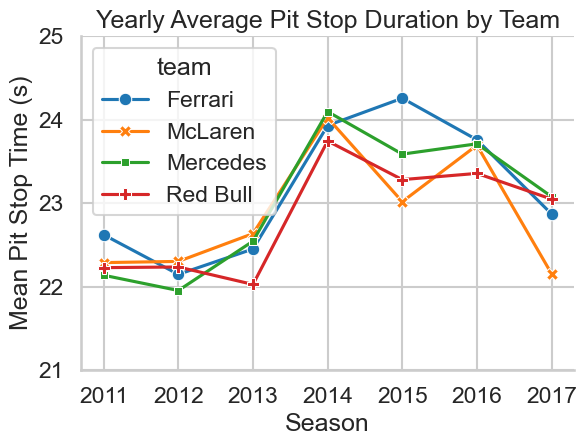

In [168]:
sns.set_theme(style="whitegrid", context="talk")
ax = sns.lineplot(x="year", y="seconds", style="team",
                    data=df_for_plot.seconds.mean(), palette = "tab10", dashes = False, markers = True, hue = "team")

ax.set(
    ylim=(21, 25),
    xlabel="Season",
    ylabel="Mean Pit Stop Time (s)",
    title="Yearly Average Pit Stop Duration by Team"
)
sns.despine()
plt.tight_layout()
plt.show()

**PLOT ANALYSIS** : 
Plot shows the yearly average pit Stop Duration by Team from 2011 to 2017. There are both common and individualistic change among the teams. Mercedes has had the best performance in this time period averaging 21.953 seconds among all teams. Meanwhile, Ferrari has had the worst performance in 2015 averaging 24.258 seconds. Mercedes has the lowest average pitStop duration 

In [151]:
def plotter(df,name):
    df_mean = df.groupby("year", as_index = False)["seconds"].mean()
    sns.lineplot(data=df_mean, x="year", y="seconds", marker='o', color='red')
    plt.title(f"Mean Pit Stop Time per Year {name}")
    plt.xlabel("Year")
    plt.ylabel("Mean Pit Stop Time (seconds)")
    plt.grid(True)
    plt.ylim(21.5,25)
    plt.tight_layout()
    plt.show()

SyntaxError: invalid syntax (515454141.py, line 2)

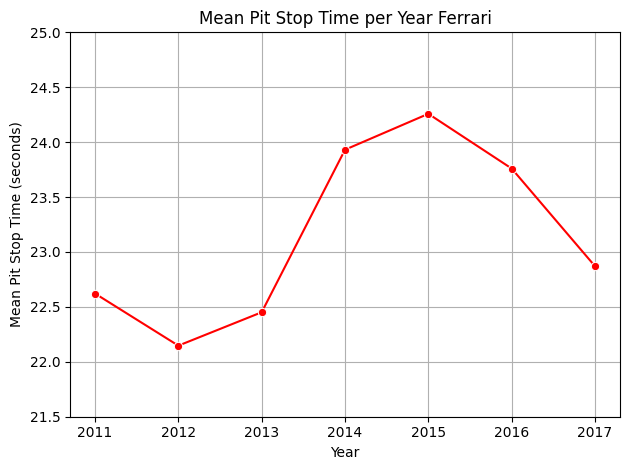

In [146]:
plotter(df_for_ferrari,"Ferrari")

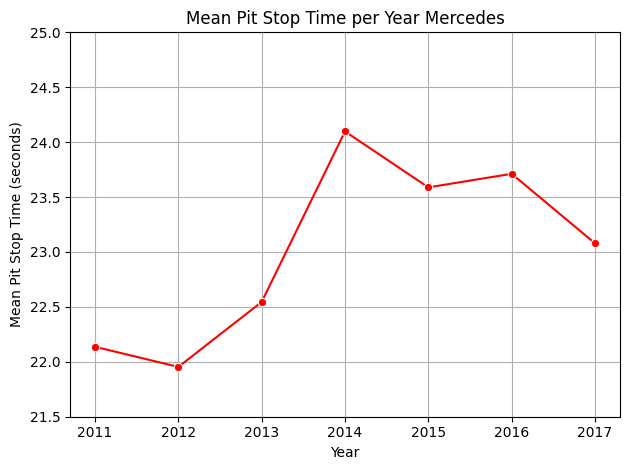

In [147]:
plotter(df_for_mercedes, "Mercedes")

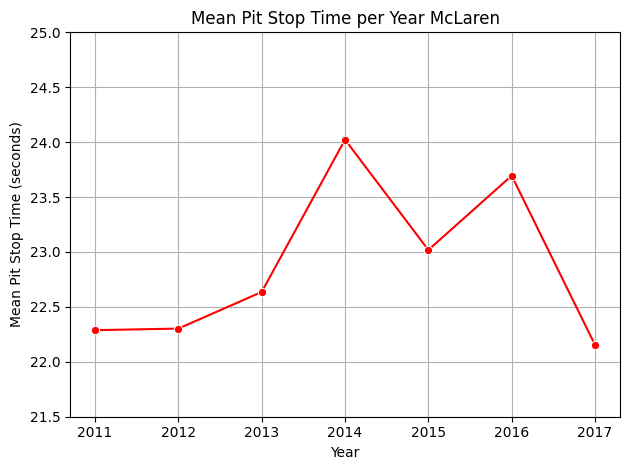

In [148]:
plotter(df_for_mclaren, "McLaren")

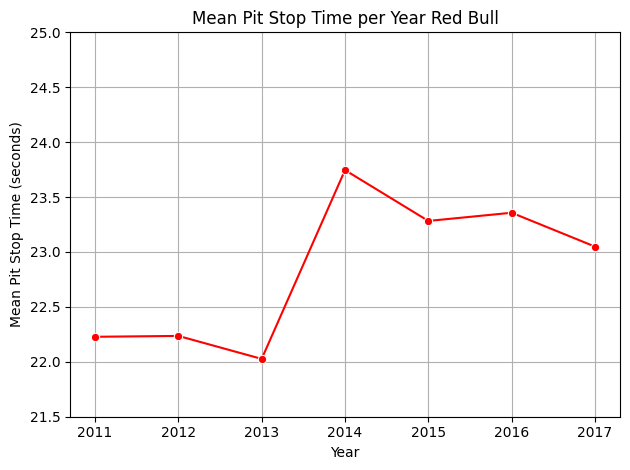

In [149]:
plotter(df_for_redbull, "Red Bull")